# PHYS 125 Python Assignment 1: Ballistic Motion

## Preamble
By the end of this assignment, you will be able to plot functions and make simple animations to illustrate physical systems.

### Prerequisites: 
* Kinematics
* Vectors

### Computational topics:
* Arrays
* Plotting
* Functions

### Specific tools used:
* min, max, abs, os.makedirs
* numpy functions: linspace, sqrt, sin, cos
* matplotlib
  * pyplot, figure, savefig 
  * plot, title, x/ylabel, legend

In this assignment you will examine ballistic motion, namely the motion of a projectile with an initial velocity and only gravity acting on it.  You will make plots of the coordinates as a function of time for a specific projectile angle, and plots of the maximum height & distance reached as a function of projectile angle.

![CNX_UPhysics_04_03_Soccer-2155214583.jpeg](attachment:CNX_UPhysics_04_03_Soccer-2155214583.jpeg "from https://pressbooks.bccampus.ca/universityphysicssandbox/chapter/projectile-motion/")


You may wish to skim through this entire document before you start writing code.  
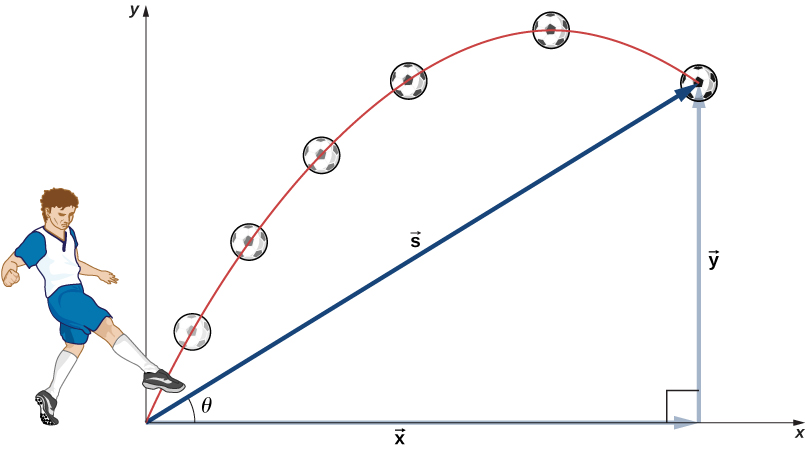

# Setup

A module is set of useful code written by other people that you don't want to rewrite yourself.  To use their code, you must "import" them into your own own.  The following import statements import modules that will be useful for this exercise.  It is good practice to put all import statements at the top of your program, to only import one thing per line, and to not rename the things you are importing.  Standard exceptions are the renaming of numpy to np and matplotlib.pyplot to plt.

To run these statements, click on the code box (such as the one below) and hit CTRL-ENTER

In [ ]:
import os  # for manipulating files on the computer
# Numpy is used to create and manipulate arrays of numbers.  Note that numpy arrays are a bit different from lists.
import numpy as np 
import matplotlib.pyplot as plt # for plotting things

For the entire assignment, let the projectile start with an initial speed v<sub>0</sub> = 30 m/s, initial coordinates (x<sub>0</sub>, y<sub>0</sub>) = (0, 0), and that the motion starts at t<sub>0</sub> = 0 s.  Let's define these quantities below.  Let's also define the number of points you will use for your plots.

In [ ]:
# Ballistic motion constants
g = -9.81  # m/s² gravity (note the sign)
v0 = 50  # Initial speed in m/s
x0, y0 = 0, 0  # Initial coordinates
t0 = 0  # Initial time
npoints = 21  # Number of points to use in plots

The above quantities g, v0, x0, y0, t0 and npoints are called "variables" with values as assigned above.  To see the value of the variable g, just print it like this:

In [ ]:
print(g)

# Generate Values

Let's make an "array" of time values from t<sub>0</sub> to some t<sub>1</sub>, in the number of steps we defined as npoints.  The numpy module is the standard package for creating arrays and doing all sorts of other array operations.  Here we will use the numpy function called `linspace` to create our array.

In [ ]:
t0, t1 = 0.0, 100.0
times = np.linspace(t0, t1, npoints)

Let's see what this array looks like.

In [ ]:
print(times)

One of the nice things about numpy arrays is that if you perform an operation on the array, you do it on every number in that array.  For example, let's see what happens when you multiply the times array by 2:

In [ ]:
times_new = times*2
print(times_new)

For ballistic motion, we'd like to know the x- and y-coordinates at every time in the times array, which is determined by the kinematic equations:<br>
$x(t) = x_0 + v_{0,x}t$ <BR>
$y(t) = y_0 + v_{0,y}t + \frac{1}{2}at^2$ <BR>
where $v_{0,x}$ and $v_{0,y}$ are the x- and y-components of the initial velocity.  These x- and y-components depend on the launch angle.

Let's generate an array of x-values for every time in the times array, assuming a launch angle of 70 degrees.  You will need:
* the variables defined above
* the numpy trigonometric functions `np.sin(theta)` and `np.cos(theta)` where theta is in radians
* the value of $\pi$ which is stored in the variable np.pi
* the exponent operation: `a**3` means "a to the power of 3"
  
Also generate an array of y-values for every time in the times array.  Print the y-values.  Replace the "..."'s below with the correct code.

In [ ]:
theta_degrees = 70.0
theta_radians = ...
x_array = ...
y_array = ...

In [ ]:
############
# SOLUTION #
############
theta_degrees = 70.0
theta_radians = theta_degrees*np.pi/180
x_array = x0 + v0*np.cos(theta_radians)*times
y_array = y0 + v0*np.sin(theta_radians)*times + 0.5*g*times**2
print(y_array)

Check that your values are reasonable. What do you notice about the values? Does your $y$-coordinate go negative after some time? That's when the projectile hits the ground! We can make a plot of $y$ vs $t$ like this:

In [ ]:
plt.plot(times, y_array)  # the order of the "arguments" of the plot() function is: x-axis values, y-axis values
plt.xlabel('Time (s)')
plt.ylabel('y-position (m)')

Clearly, it is unrealistic to plot negative values since the ball doesn't sink into the ground.  How much time should we plot for ballistic motion? We should end the plot when the projectile hits the ground.  Let's work out the value of $t$ when $y(t) = 0$:

$0 = \frac{1}{2}gt^2 + v_{0y}t + y_0$

$0 = t^2 + \frac{2v_{0y}}{g}t + 2\frac{y_0}{g}$

Use the quadratic formula with $a = 1$, $b = 2\frac{v_0y}{g}, c = 2y_0$

$t_± = \left(-\frac{2v_{0y}}{g} ± \sqrt{(2v_{0y}/g)^2 - 4×2y_0}\right)/2$

Note that the result $t_-$ always gives 0, this is the other point at which y = 0, at launch.  The result $t_+$ is what we want.  Let's call it the flight time $t_{\rm flight}$.

We're going to use this formula again and again to compute $t_{\rm flight}$ for lots of values of the launch angle theta.  So instead of generating an array of values of of $t_{\rm flight}$ for an array of values for theta, let's write a function that we can use over and over.  

You've already used the functions `np.linspace()` and `plt.plot()`.  The "arguments" (input) of `np.linspace()` were t0, t1, and npoints, and the output was an array of values.  You will now write your own function with a single argument: the launch angle `theta_d` in degrees.  The output should be the total flight time for that launch angle.

The basic structure of the functions is provided in the cell below this one, you need to replace the `...` with actual code that defines what `answer` is.

Note that since the variables that we defined above (`x0`, `g`, etc) were defined outside of a function, they are "global" variables, and can be used inside a function without passing them as arguments to the function. 

In [ ]:
def t_flight(theta_d):
    """Return the projectile flight time as a function of
    launch angle in degrees."""
    theta_r = ... # angle in radiants
    v0y = ...  # y-component of the initial velocity
    answer = ...  # t-minus from the equation above
    return answer

In [ ]:
############
# SOLUTION #
############
def t_flight(theta_d):
    """Return the projectile flight time as a function of
    launch angle in degrees."""
    theta_r = theta_d*np.pi/180
    v0y = v0*np.sin(theta_r)
    t = (-2*v0y/g + np.sqrt((2*v0y/g)**2 - 8*y0))/2
    return t


Print the value of $t_{\rm flight}$ for a theta of 30 degrees.  You should get something close to 5s.

In [ ]:
print(t_flight(30.0))

Now that we've found the flight time, we should create a new `times` array from 0 to $t_{\rm flight}$ instead of 0 to 100.

In [ ]:
theta_plot = 75  # Degrees
t1 = ... # use the t_flight function to get the final time.
times = ...  # Note we use t0, t1, and npoints as arguments. 

In [ ]:
############
# SOLUTION #
############
theta_plot = 75  # Degrees
t1 = t_flight(theta_plot) # use the t_flight function to get the final time.
times = np.linspace(t0, t1, npoints)  # Note we use t0, t1, and npoints as arguments. 

We also need new $x$- and $y$-values.  Let's write two functions to compute these, since we'll have to reuse them.

In [ ]:
def x(times, theta_degrees):
    theta_radians = ...
    x = ...
    return x

def y(times, theta_degrees):
    theta_radians = ...
    y = ...
    return y

In [ ]:
############
# SOLUTION #
############
def x(times, theta_degrees):
    theta_radians = theta_degrees*np.pi/180.
    x = x0 + v0*np.cos(theta_radians)*times
    return x

def y(times, theta_degrees):
    theta_radians = theta_degrees*np.pi/180.
    y = y0 + v0*np.sin(theta_radians)*times + 0.5*g*times**2
    return y

And now let's use the functions to create arrays of x and y values:

In [ ]:
x_values = x(times, theta_plot)
y_values = y(times, theta_plot)

Now let's make the y vs t plot again and check that the plot stops when the ball reaches the ground.  

In [ ]:
... # use plt.plot() to plot y vs t
... # label the x-axis
... # label the y-axis

In [ ]:
############
# SOLUTION #
############
plt.plot(times,y_values)  
plt.xlabel('Time (s)')
plt.ylabel('y-position (m)')

## First Saved Plot
Now let's make a plot where both y vs t and x vs t are on the same plot.  But since they will be on the same plot, we'll want to create a legend saying which curve is which.  This will also be the first plot we will save as an image file.  The following example shows how to create a new figure, plot two curves on it, and give it a legend.

Note: All plots should have axis labels, with units.  Individual plot titles are not necessary but an overall figure title or caption should be included.  Plots with multiple lines should include a legend.

In [ ]:
# Create a figure object (a metaphor for a window or piece of paper).
# Now all the "plt" commands will apply to fig1, which we'll later save.
fig1 = plt.figure()  
plt.title("Coordinates at Fixed Projectile Angle 75°")  # Give the figure a title
plt.plot(times, x_values, label="x")  # Plot x vs t.
# The argument label="" tells the legend generator what to call this curve.
plt.plot(times, y_values, label="y")  # Plot y vs t.
plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")
plt.legend()  # Automatically generate a legend

### Saving the First Plot
Let's also save the plot as an image file.  We could then include it in a report, presentation, or email it to someone.  

It is good practice to put your plots or any other output files into a separate directory from your code.  Within python we can use the `os` module to create a subdirectory for our plots.  `exist_ok=True` tells it not to consider it an error if the directory already exists.  

In [ ]:
os.makedirs("plots", exist_ok=True)

Finally save the file in the plots directory.

In [ ]:
fig1.savefig("plots/PHYS125_Ballistic_Coordinates.png") # This is why creating the fig1 object was handy.

## Second Saved Plot
Now you will make a second plot of y vs x over all the time values.  This will produce a line showing the path of the projectile.  

Follow the example above to plot y vs x for a launch angle of 75 degrees and also for 30 degees on the same plot.

In [ ]:
fig2 = ...  # Create the figure object

# compute x and y for theta=75 degrees and plot it
theta = 75.0
t1 = ... # use the t_flight function to get the final time.
times = ...  # use linspace
x_values = ...
y_values = ...
... # use the plt.plot() to plot y vs x and give it label for the legend.

# compute x and y for theta=30 degrees and plot it
theta = 30.0
t1 = ... 
times = ...  
x_values = ...
y_values = ...
... # use the plt.plot() to plot y vs x and give it label for the legend.

... # label the x-axis
... # label the y-axis
... # create the legend
... # Give the plot a title
... # save the figure within the plots directory with the name "PHYS125_Ballistic_Path.png"

In [ ]:
############
# SOLUTION #
############

fig2 = plt.figure()  # Create the figure object

# compute x and y for theta=75 degrees and plot it
theta = 75.0
t1 = t_flight(theta) # use the t_flight function to get the final time.
times = np.linspace(t0, t1, npoints)  # Note we use t0, t1, and npoints as arguments. 
x_values = x(times, theta)
y_values = y(times, theta)
plt.plot(x_values, y_values, label="θ=75 deg")

# compute x and y for theta=30 degrees and plot it
theta = 30.0
t1 = t_flight(theta) # use the t_flight function to get the final time.
times = np.linspace(t0, t1, npoints)  # Note we use t0, t1, and npoints as arguments. 
x_values = x(times, theta)
y_values = y(times, theta)
plt.plot(x_values, y_values, label="θ=30 deg")

plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.legend()
plt.title('The Path of a Projectile Launched at Two Angles')
fig2.savefig("plots/PHYS125_Ballistic_Path.png")

## Third Saved Plot
What launch angle makes the ball fly the farthest?  You could rerun the above plot with different angles, but it will be easier to plot the maximum x-distance as function of different launch angles.  

Let's calculate the maximum x-distance.  We already have a function for calculating when the projectile hits the ground `t_flight()`, and we know the maximum horizontal distance is reached exactly at this time.  So the maximum distance reached at each angle is:

In [ ]:
launch_angles = np.linspace(0, 90, npoints) # in degrees; Let's do more angles this time
flight_times = t_flight(launch_angles)
x_maxes = x(flight_times, launch_angles)

You are now ready to create your 3rd figure.  Plot the x_maxes vs launch_angles and save the plot.

In [ ]:
fig3 = ... # create the fig3 object
... # Give the plot a title
... # Use plt.plot() to plot the curve
... # label the x-axis 
... # label the y-axis
... # Save the figure in the plots directory with the name "PHYS125_Maxima.png"

In [ ]:
############
# SOLUTION #
############
fig3 = plt.figure()
plt.title("Maximum x distance travelled.")
plt.plot(launch_angles, x_maxes)  # maximum distance vs angle
plt.xlabel("Angle (°)")
plt.ylabel("Maximum distance (m)")
fig3.savefig("plots/PHYS125_Maxima.png")

## Clean-Up
Go through the code that you wrote and add comments for anything that is non-obvious.  You need to be able to come back to this code in 6 months or a year and easily understand what you did.  Pragmatically, the instructor and grading TA needs to be able to understand your code.

TIP: if you would like to use colourblind-friendly colour combinations, this is most easily done by including the following line in your code before making any plots:
`plt.style.use('tableau-colorblind10')`

## Discussion of Results
Write your responses to the following questions with a `>` at the start of each line to create a Markdown "blockquote" like this:

> This is my response.

1. What happens if you calculate and plot coordinates before $t = 0$ or after $t = t_1$?
2. How should we choose the number of points to plot?  What happens if you use a small number like 5, or a very large number like 1000000?
3. What happens if you change the initial speed of the projectile and re-generate the figures?  
4. Can you use this code to generate equivalent figures if gravity were different, like on the surface of the moon?
5. List at least 3 assumptions that were made in this exercise, and briefly describe how you might generalize the code to remove these assumptions (1-2 sentences).
3. What were the easiest and most difficult parts of this assignment?  
4. Do you feel confident making plots of other physical phenomena?

## Submission and Grading
Submit a single-file Jupyter notebook named PHYS125_BallisticMotion_SFUID.ipynb  This file will be run by the grading TA and it is expected to produce the three plots.  We will look for:
1. The code runs without raising exceptions or crashing.
2. The code is readable and has useful comments throughout, without unnecessary comments for trivial operations.
4. All plots have proper axis labels, with units.
5. The plots generally contain the expected data.
6. You have written responses to the Discussion questions at the bottom of your code, in plain english using complete sentences.


